In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

In [4]:

# Load and preprocess MNIST data
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape((60000, 28, 28, 1)).astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1)).astype('float32') / 255
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)



In [6]:
# Define Inception module
def inception_module(x, filters):
    conv1x1_1 = layers.Conv2D(filters[0], (1, 1), padding='same', activation='relu')(x)

    conv1x1_2 = layers.Conv2D(filters[1], (1, 1), padding='same', activation='relu')(x)
    conv3x3 = layers.Conv2D(filters[2], (3, 3), padding='same', activation='relu')(conv1x1_2)

    conv1x1_3 = layers.Conv2D(filters[3], (1, 1), padding='same', activation='relu')(x)
    conv5x5 = layers.Conv2D(filters[4], (5, 5), padding='same', activation='relu')(conv1x1_3)

    maxpool = layers.MaxPooling2D((3, 3), strides=(1, 1), padding='same')(x)
    conv1x1_4 = layers.Conv2D(filters[5], (1, 1), padding='same', activation='relu')(maxpool)

    inception = layers.Concatenate(axis=-1)([conv1x1_1, conv3x3, conv5x5, conv1x1_4])
    return inception

# Build Inception v1 model
def inception_v1_model():
    input_layer = layers.Input(shape=(28, 28, 1))

    x = layers.Conv2D(64, (7, 7), strides=(2, 2), padding='same', activation='relu')(input_layer)
    x = layers.MaxPooling2D((3, 3), strides=(2, 2), padding='same')(x)

    x = layers.Conv2D(192, (3, 3), padding='same', activation='relu')(x)
    x = layers.MaxPooling2D((3, 3), strides=(2, 2), padding='same')(x)

    x = inception_module(x, [64, 128, 128, 32, 32, 32])
    x = inception_module(x, [128, 192, 96, 64, 64, 64])

    x = layers.Flatten()(x)
    x = layers.Dense(256, activation='relu')(x)
    x = layers.Dropout(0.5)(x)
    output_layer = layers.Dense(10, activation='softmax')(x)

    model = models.Model(inputs=input_layer, outputs=output_layer)
    return model

# Create and compile the model
model = inception_v1_model()
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(train_images, train_labels, epochs=5, batch_size=32, validation_data=(test_images, test_labels))

Epoch 1/5
1875/1875 [==============================] - 279s 147ms/step - loss: 0.1942 - accuracy: 0.9401 - val_loss: 0.0802 - val_accuracy: 0.9760
Epoch 2/5
1875/1875 [==============================] - 267s 142ms/step - loss: 0.0695 - accuracy: 0.9805 - val_loss: 0.0313 - val_accuracy: 0.9904
Epoch 3/5
1875/1875 [==============================] - 273s 145ms/step - loss: 0.0521 - accuracy: 0.9859 - val_loss: 0.0410 - val_accuracy: 0.9880
Epoch 4/5
1875/1875 [==============================] - 272s 145ms/step - loss: 0.0460 - accuracy: 0.9873 - val_loss: 0.0403 - val_accuracy: 0.9882
Epoch 5/5
1875/1875 [==============================] - 267s 142ms/step - loss: 0.0388 - accuracy: 0.9891 - val_loss: 0.0579 - val_accuracy: 0.9831


In [7]:
pred = model.predict(test_images)

313/313 [==============================] - 11s 32ms/step


In [9]:
print("shape = ",pred.shape)

shape =  (10000, 10)


In [10]:
pred = np.argmax(pred, axis=1)

shape =  (10000,)


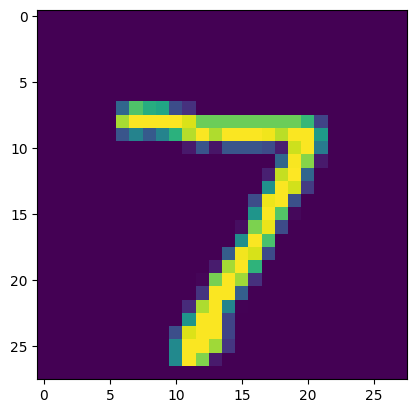

In [16]:
print("shape = ",pred.shape)
for i in range(1):
  plt.imshow(test_images[i])
  plt.show()

Text(0.5, 1.0, '0')

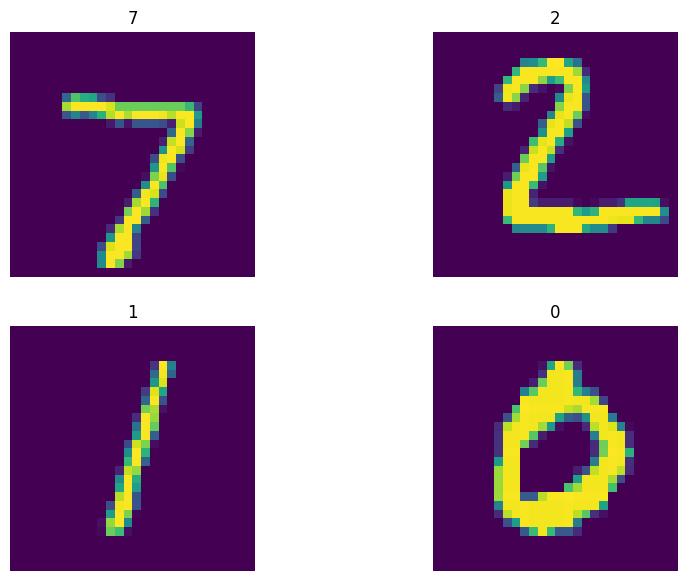

In [14]:
import cv2
from matplotlib import pyplot as plt
fig = plt.figure(figsize=(10, 7))
rows = 2
columns = 2
Image1 = test_images[0]
Image2 = test_images[1]
Image3 = test_images[2]
Image4 = test_images[3]
fig.add_subplot(rows, columns, 1)
plt.imshow(Image1)
plt.axis('off')
plt.title(pred[0])
fig.add_subplot(rows, columns, 2)
plt.imshow(Image2)
plt.axis('off')
plt.title(pred[1])
fig.add_subplot(rows, columns, 3)
plt.imshow(Image3)
plt.axis('off')
plt.title(pred[2])
fig.add_subplot(rows, columns, 4)
plt.imshow(Image4)
plt.axis('off')
plt.title(pred[3])

In [18]:
test_labels = np.argmax(test_labels, axis=1)

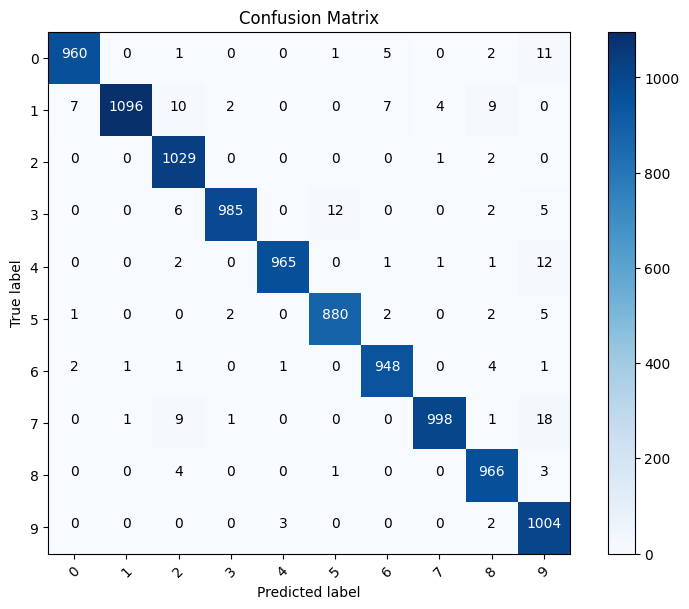

In [19]:

import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import numpy as np


cm = confusion_matrix(test_labels, pred)

plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()


classes = np.unique(np.concatenate((test_labels, pred)))
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)


thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, format(cm[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()